In [1]:
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import *
from pyspark.sql.functions import udf
from pyspark.sql.types import IntegerType

sns.set(color_codes=True)
%matplotlib inline

from pyspark.sql.functions import *

In [2]:

def isweekend(timestamp):
    date = pd.to_datetime(timestamp)
    dayOfWeek = date.dayofweek
    return dayOfWeek
        
isweekendudf = udf(isweekend,IntegerType())

def addingDateFeatures(df):
    df = (df.withColumn('year',year('date_time')).
          withColumn('month',month('date_time')).
          withColumn('dayofyear',dayofyear('date_time')).
          withColumn('dayofmonth',dayofmonth('date_time')).
          withColumn('dayofweek',isweekendudf('date_time')))


df.write.parquet("../data/enrichedata")

In [3]:
df = sqlContext.read.parquet("../data/enrichedata/*.parquet")
df = df.cache()
df.count()

37670293

In [4]:
dayofweekP = df.select('dayofweek').groupBy('dayofweek').count().toPandas()

In [5]:
dayofweekP.sort_values(by='count',ascending=False)[:10]
print(df.select('dayofweek').describe().show())

+-------+------------------+
|summary|         dayofweek|
+-------+------------------+
|  count|          37670293|
|   mean|2.7847728447453277|
| stddev|1.9960953509343948|
|    min|                 0|
|    max|                 6|
+-------+------------------+

None


Monday = 0 , Sunday = 6

In [8]:
def barPlotPySpark(df,collist):
    """pass a pyspark dataframe and list of columns for which you want a barchart to be produced."""
    for col in collist:
        tempPandas = df.select(col).groupBy(col).count().toPandas()
        width=len(tempPandas)
        height = 0
        if(width > 20):
            height = 8
        else:
            height = 4
        plt.figure(figsize=(width,height))
        sns.barplot(x=col,y='count',data=tempPandas)
        ;
        show(block=True)
        summaryStats = getSummaryStats(df,col)
        summaryStats.show()
        popularCategories = mostAndLeastPopularCategories(tempPandas)
        print(popularCategories)
        
        

def getSummaryStats(df,col):
    return df.select(col).describe()

def mostAndLeastPopularCategories(pandas):
    str = ('Least popular categories  \n{0} \nMost popular categories \n{1}'
          .format(pandas.sort_values(by='count')[:10],pandas.sort_values(by='count',ascending=False)[:10]))
    return str
    
    

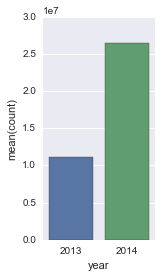

+-------+-------------------+
|summary|               year|
+-------+-------------------+
|  count|           37670293|
|   mean| 2013.7030317497133|
| stddev|0.45692243778412783|
|    min|               2013|
|    max|               2014|
+-------+-------------------+

Least popular categories  
   year     count
0  2013  11186881
1  2014  26483412 
Most popular categories 
   year     count
1  2014  26483412
0  2013  11186881


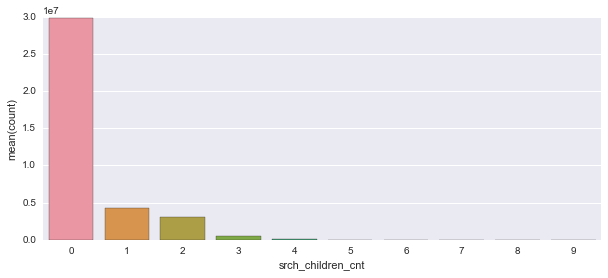

+-------+------------------+
|summary| srch_children_cnt|
+-------+------------------+
|  count|          37670293|
|   mean|0.3321221579030458|
| stddev|0.7314980986397256|
|    min|                 0|
|    max|                 9|
+-------+------------------+

Least popular categories  
   srch_children_cnt     count
9                  9       883
8                  8      2416
7                  7      2699
6                  6     15415
5                  5     19573
4                  4    138308
3                  3    491086
2                  2   3014356
1                  1   4219414
0                  0  29766143 
Most popular categories 
   srch_children_cnt     count
0                  0  29766143
1                  1   4219414
2                  2   3014356
3                  3    491086
4                  4    138308
5                  5     19573
6                  6     15415
7                  7      2699
8                  8      2416
9                  9       883


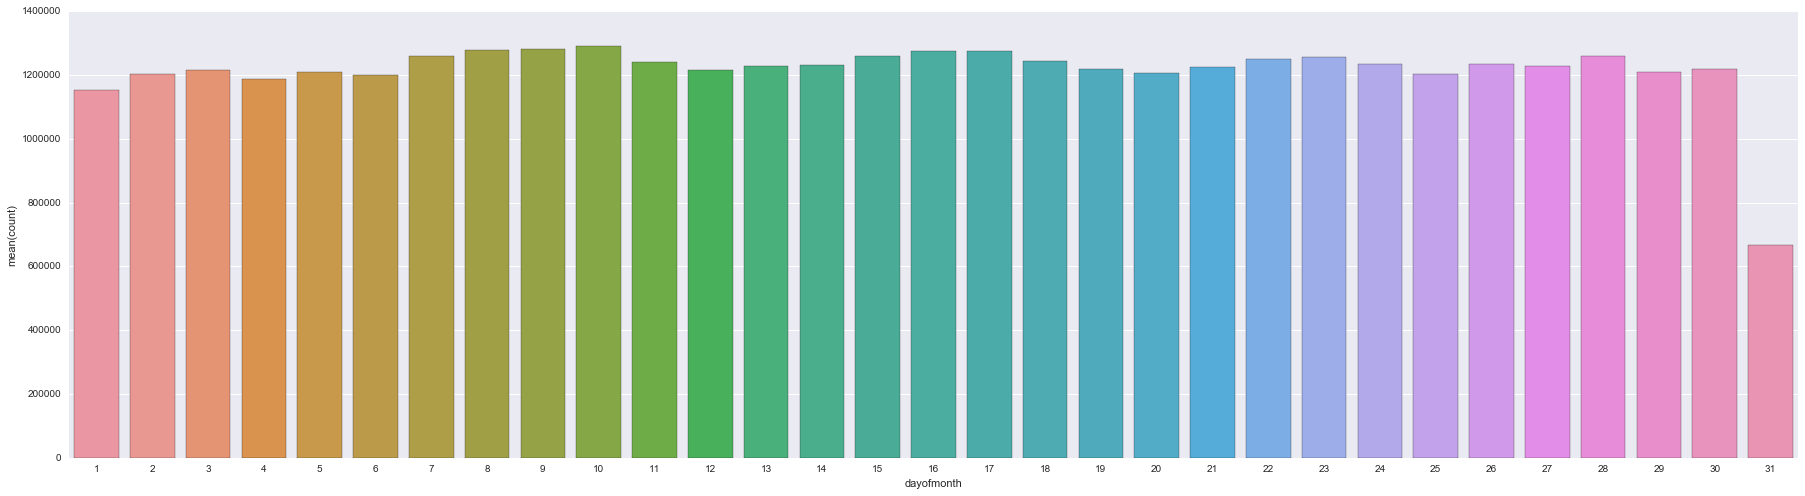

+-------+------------------+
|summary|        dayofmonth|
+-------+------------------+
|  count|          37670293|
|   mean|15.810066754723676|
| stddev| 8.766170689063582|
|    min|                 1|
|    max|                31|
+-------+------------------+

Least popular categories  
    dayofmonth    count
0           31   666831
1            1  1152348
4            4  1188039
6            6  1201174
2            2  1203240
25          25  1203817
20          20  1206507
5            5  1209117
29          29  1209222
3            3  1216112 
Most popular categories 
    dayofmonth    count
10          10  1291581
9            9  1281171
8            8  1279478
17          17  1275605
16          16  1275248
7            7  1261165
28          28  1259922
15          15  1259552
23          23  1256212
22          22  1249114


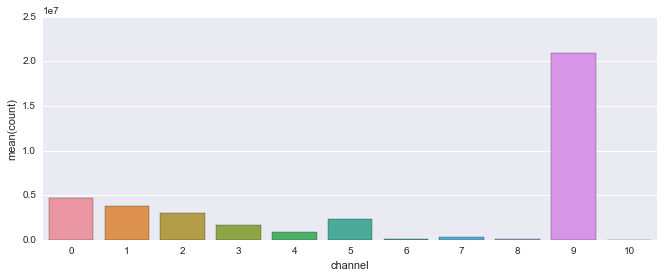

+-------+------------------+
|summary|           channel|
+-------+------------------+
|  count|          37670293|
|   mean|5.8707613981128315|
| stddev|3.7170945586290887|
|    min|                 0|
|    max|                10|
+-------+------------------+

Least popular categories  
    channel    count
10       10     6203
6         6    60833
8         8   112265
7         7   313195
4         4   823023
3         3  1676536
5         5  2326077
2         2  2966352
1         1  3819309
0         0  4685201 
Most popular categories 
   channel     count
9        9  20881299
0        0   4685201
1        1   3819309
2        2   2966352
5        5   2326077
3        3   1676536
4        4    823023
7        7    313195
8        8    112265
6        6     60833


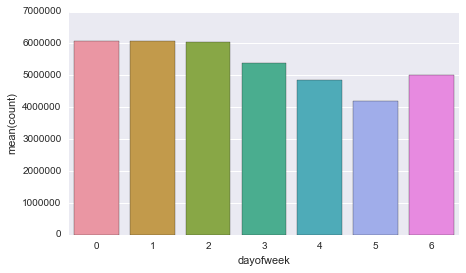

+-------+------------------+
|summary|         dayofweek|
+-------+------------------+
|  count|          37670293|
|   mean|2.7847728447453277|
| stddev|1.9960953509343948|
|    min|                 0|
|    max|                 6|
+-------+------------------+

Least popular categories  
   dayofweek    count
5          5  4207670
4          4  4866935
6          6  5012397
3          3  5378831
2          2  6060134
1          1  6065976
0          0  6078350 
Most popular categories 
   dayofweek    count
0          0  6078350
1          1  6065976
2          2  6060134
3          3  5378831
6          6  5012397
4          4  4866935
5          5  4207670


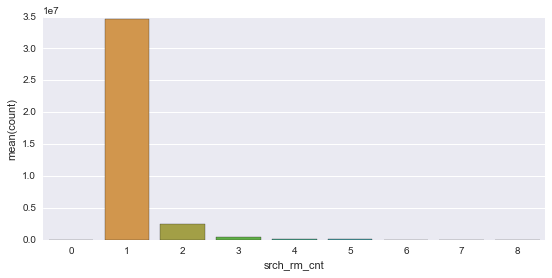

+-------+-------------------+
|summary|        srch_rm_cnt|
+-------+-------------------+
|  count|           37670293|
|   mean| 1.1126628083301608|
| stddev|0.45911549963856274|
|    min|                  0|
|    max|                  8|
+-------+-------------------+

Least popular categories  
   srch_rm_cnt     count
0            0       859
7            7     12614
6            6     23341
8            8     30663
5            5     46658
4            4    106916
3            3    419159
2            2   2492172
1            1  34537911 
Most popular categories 
   srch_rm_cnt     count
1            1  34537911
2            2   2492172
3            3    419159
4            4    106916
5            5     46658
8            8     30663
6            6     23341
7            7     12614
0            0       859


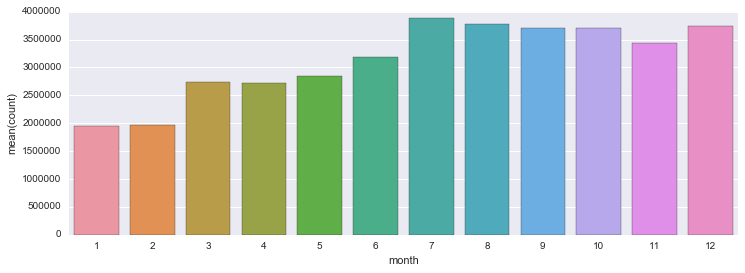

+-------+-----------------+
|summary|            month|
+-------+-----------------+
|  count|         37670293|
|   mean|7.137657225018133|
| stddev|3.268327081501998|
|    min|                1|
|    max|               12|
+-------+-----------------+

Least popular categories  
    month    count
0       1  1953365
1       2  1975372
3       4  2712327
2       3  2743173
4       5  2840308
5       6  3190844
10     11  3434723
8       9  3700667
9      10  3705635
11     12  3746582 
Most popular categories 
    month    count
6       7  3893567
7       8  3773730
11     12  3746582
9      10  3705635
8       9  3700667
10     11  3434723
5       6  3190844
4       5  2840308
2       3  2743173
3       4  2712327


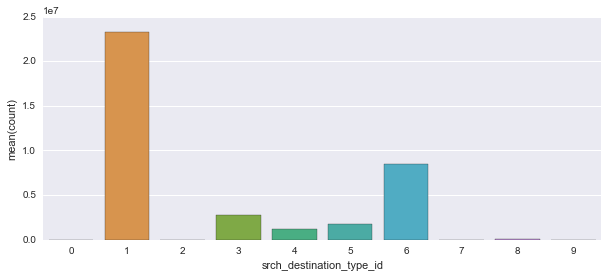

+-------+------------------------+
|summary|srch_destination_type_id|
+-------+------------------------+
|  count|                37670293|
|   mean|      2.5822799148389954|
| stddev|      2.1530189593998985|
|    min|                       0|
|    max|                       9|
+-------+------------------------+

Least popular categories  
   srch_destination_type_id     count
2                         2         1
0                         0        12
9                         9      1616
7                         7      3250
8                         8    136030
4                         4   1232056
5                         5   1793862
3                         3   2747955
6                         6   8450559
1                         1  23304952 
Most popular categories 
   srch_destination_type_id     count
1                         1  23304952
6                         6   8450559
3                         3   2747955
5                         5   1793862
4                      

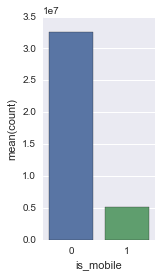

+-------+------------------+
|summary|         is_mobile|
+-------+------------------+
|  count|          37670293|
|   mean|0.1349265056154461|
| stddev|0.3416450596691635|
|    min|                 0|
|    max|                 1|
+-------+------------------+

Least popular categories  
   is_mobile     count
1          1   5082721
0          0  32587572 
Most popular categories 
   is_mobile     count
0          0  32587572
1          1   5082721


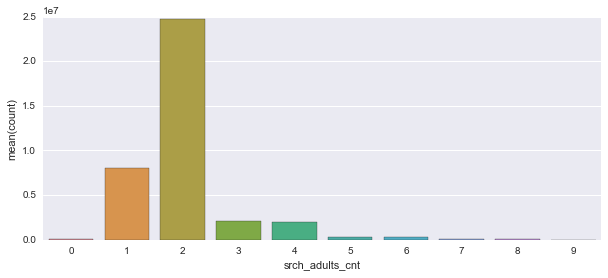

+-------+------------------+
|summary|   srch_adults_cnt|
+-------+------------------+
|  count|          37670293|
|   mean|2.0242958290767743|
| stddev|0.9116678125666119|
|    min|                 0|
|    max|                 9|
+-------+------------------+

Least popular categories  
   srch_adults_cnt     count
9                9     15454
7                7     44414
0                0     70979
8                8     86985
5                5    283974
6                6    336527
4                4   1995623
3                3   2070774
1                1   8055019
2                2  24710544 
Most popular categories 
   srch_adults_cnt     count
2                2  24710544
1                1   8055019
3                3   2070774
4                4   1995623
6                6    336527
5                5    283974
8                8     86985
0                0     70979
7                7     44414
9                9     15454


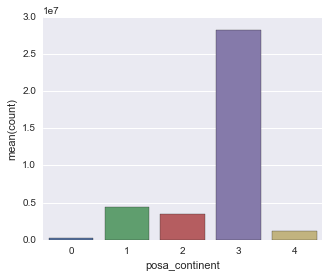

+-------+------------------+
|summary|    posa_continent|
+-------+------------------+
|  count|          37670293|
|   mean|2.6804730188851997|
| stddev|0.7480393482506555|
|    min|                 0|
|    max|                 4|
+-------+------------------+

Least popular categories  
   posa_continent     count
0               0    265110
4               4   1190726
2               2   3515919
1               1   4458076
3               3  28240462 
Most popular categories 
   posa_continent     count
3               3  28240462
1               1   4458076
2               2   3515919
4               4   1190726
0               0    265110


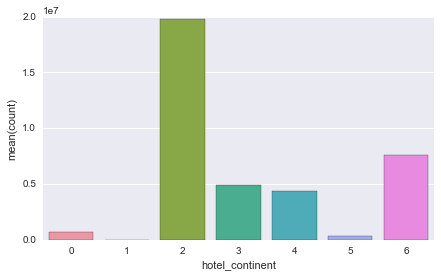

+-------+------------------+
|summary|   hotel_continent|
+-------+------------------+
|  count|          37670293|
|   mean|3.1563047837190967|
| stddev|1.6231886782105807|
|    min|                 0|
|    max|                 6|
+-------+------------------+

Least popular categories  
   hotel_continent     count
1                1       214
5                5    373841
0                0    712270
4                4   4339118
3                3   4895159
6                6   7572044
2                2  19777647 
Most popular categories 
   hotel_continent     count
2                2  19777647
6                6   7572044
3                3   4895159
4                4   4339118
0                0    712270
5                5    373841
1                1       214


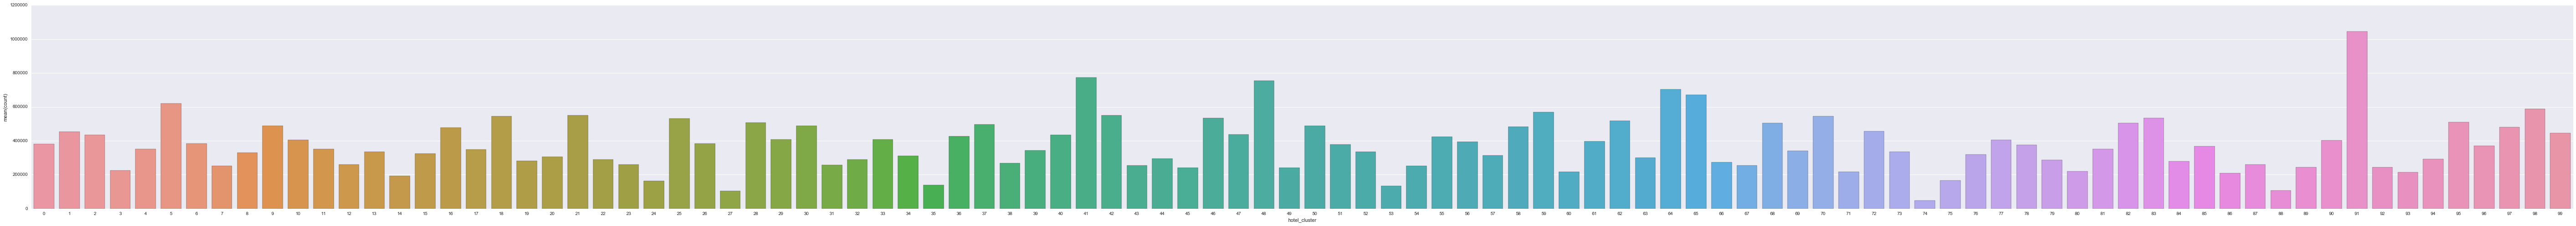

+-------+------------------+
|summary|     hotel_cluster|
+-------+------------------+
|  count|          37670293|
|   mean| 49.80860501934509|
| stddev|28.915950805004556|
|    min|                 0|
|    max|                99|
+-------+------------------+

Least popular categories  
    hotel_cluster   count
43             74   48355
96             27  105040
57             88  107784
22             53  134812
4              35  139122
93             24  164127
44             75  165226
83             14  192299
55             86  209054
62             93  214293 
Most popular categories 
    hotel_cluster    count
60             91  1043720
10             41   772743
17             48   754033
33             64   704734
34             65   670960
74              5   620194
67             98   589178
28             59   570291
11             42   551605
90             21   550092


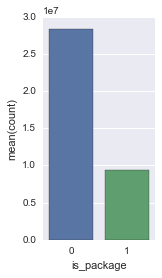

+-------+-------------------+
|summary|         is_package|
+-------+-------------------+
|  count|           37670293|
|   mean|0.24890422275186444|
| stddev| 0.4323782089918281|
|    min|                  0|
|    max|                  1|
+-------+-------------------+

Least popular categories  
   is_package     count
1           1   9376295
0           0  28293998 
Most popular categories 
   is_package     count
0           0  28293998
1           1   9376295


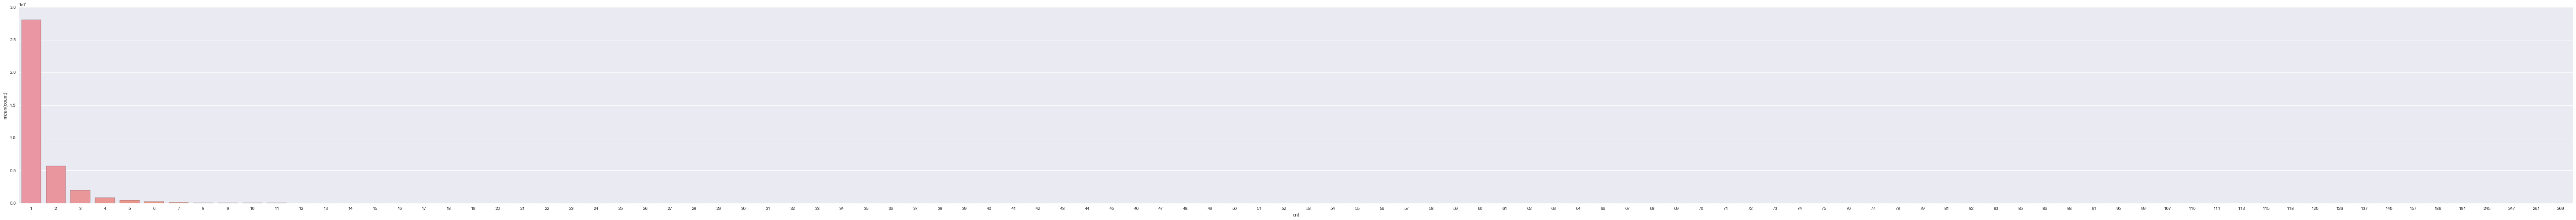

+-------+------------------+
|summary|               cnt|
+-------+------------------+
|  count|          37670293|
|   mean|1.4833839227106622|
| stddev|1.2197755786558453|
|    min|                 1|
|    max|               269|
+-------+------------------+

Least popular categories  
    cnt  count
71  157      1
40   69      1
41  269      1
43   71      1
46   74      1
48   76      1
72  186      1
52   81      1
53   82      1
54   83      1 
Most popular categories 
    cnt     count
74    1  28091115
75    2   5686424
76    3   2024726
77    4    842356
78    5    426092
79    6    224373
80    7    132234
81    8     78360
82    9     51009
83   10     32763


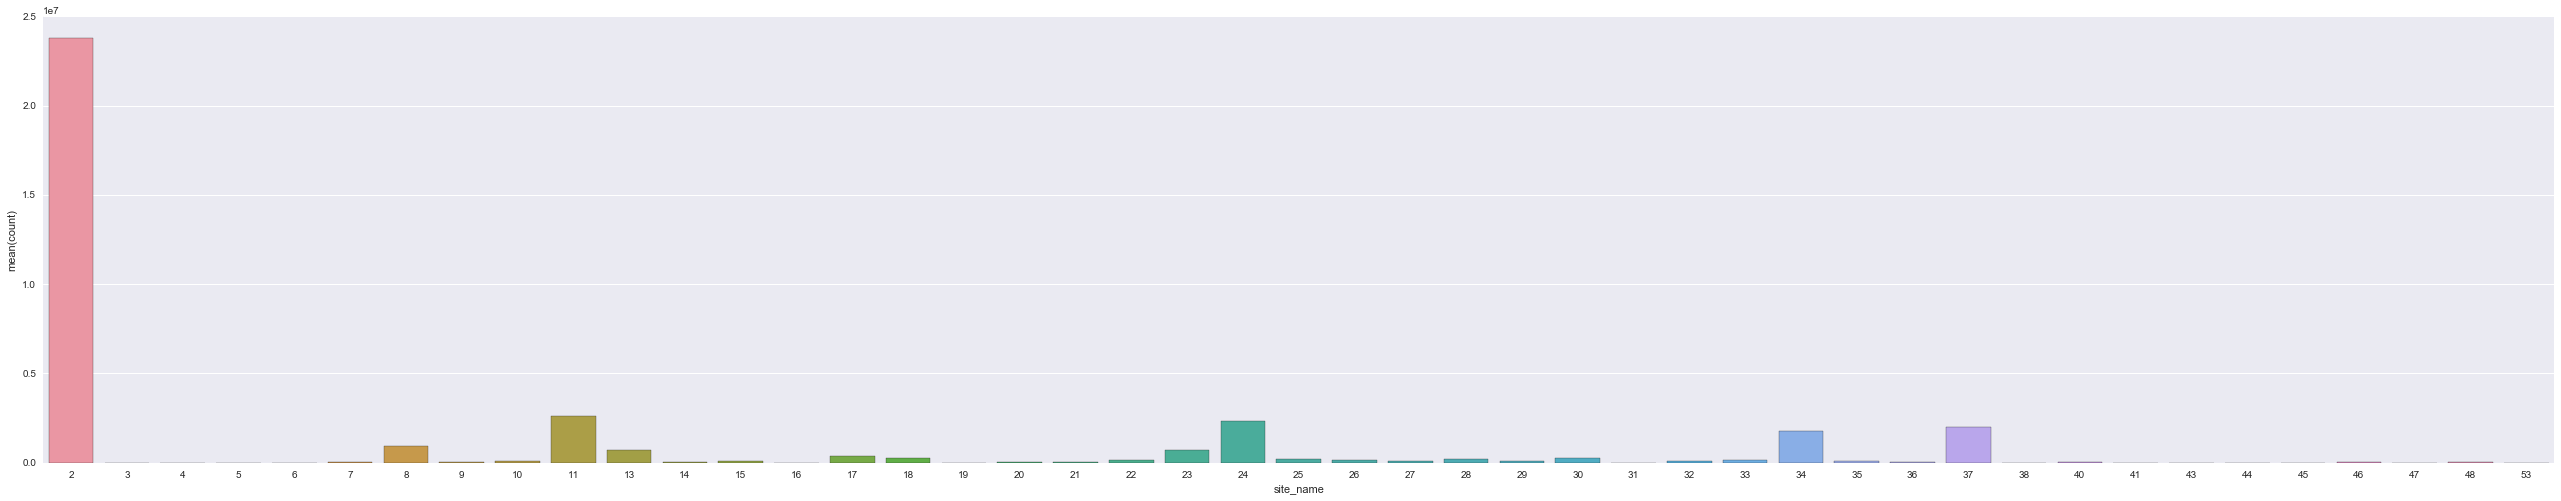

+-------+------------------+
|summary|         site_name|
+-------+------------------+
|  count|          37670293|
|   mean| 9.795271329585889|
| stddev|11.967543566513172|
|    min|                 2|
|    max|                53|
+-------+------------------+

Least popular categories  
    site_name  count
18          3      2
19          4      5
20          5     11
9          41    903
14         47   1062
11         44   3242
10         43   3419
12         45   5009
30         16   6686
7          38   7549 
Most popular categories 
    site_name     count
17          2  23790351
26         11   2605866
38         24   2363595
6          37   2013818
3          34   1784564
23          8    943325
37         23    730361
27         13    695341
31         17    372084
32         18    258955


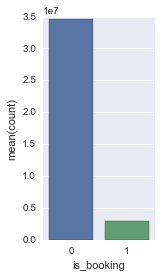

+-------+-------------------+
|summary|         is_booking|
+-------+-------------------+
|  count|           37670293|
|   mean|0.07965674702875288|
| stddev| 0.2707610600283737|
|    min|                  0|
|    max|                  1|
+-------+-------------------+

Least popular categories  
   is_booking     count
1           1   3000693
0           0  34669600 
Most popular categories 
   is_booking     count
0           0  34669600
1           1   3000693


In [9]:
def findApproximateDistinctCount(df):
    coldistinctvaluecount = {}
    for col in df.schema.names:
        apprxuniquecount = df.select(col).sample(True,0.01).distinct().count()
        coldistinctvaluecount[col]=apprxuniquecount
    return coldistinctvaluecount

def categoricalVariableAnalysis(df,categoricalvariablecount=100):
    collist=[]
    coldistinctvaluecount = findApproximateDistinctCount(df)
    for col in coldistinctvaluecount.keys():
        if(coldistinctvaluecount[col] <= categoricalvariablecount ):
            collist.append(col)
    barPlotPySpark(df,collist)

categoricalVariableAnalysis(df)